# Author Stefan Panev


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

C:\Users\Stefan\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## GRU cell
The same process as in the last notebook is taken place so, we will not cover it, until the model.

In [3]:
keeling = pd.read_csv('keeling.csv',error_bad_lines=False)

In [4]:
cols = ['Yr', 'Mn', 'Date', 'Date1', 'CO2', 'seasonally',
       'fit', 'seasonally', 'filled_CO2', 'filled_seasonally']

In [5]:
keeling.columns = cols

In [6]:
keeling = keeling.iloc[2:]

In [7]:
keeling.head()

,Yr,Mn,Date,Date1,CO2,seasonally,fit,seasonally,filled_CO2,filled_seasonally
2,1958,01,21200,1958.0411,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
3,1958,02,21231,1958.1260,-99.99,-99.99,-99.99,-99.99,-99.99,-99.99
4,1958,03,21259,1958.2027,315.70,314.42,316.19,314.90,315.70,314.42
5,1958,04,21290,1958.2877,317.46,315.15,317.30,314.98,317.46,315.15
6,1958,05,21320,1958.3699,317.51,314.71,317.85,315.06,317.51,314.71


In [8]:
co2 = keeling[['Yr','CO2']]

In [9]:
co2 = co2[co2['CO2'] != '   -99.99']

In [10]:
co2 = pd.to_numeric(co2['CO2'])

In [11]:
train_set = co2.iloc[:711]

In [12]:
test_set = co2.iloc[711:]

In [13]:
def next_batch(training_data,batch_size,steps):
    
    # start from a random starting point for each batch
    rand_start = np.random.randint(0,len(training_data)-steps) 

    # Create Y data for time series in the batches
    y_batch = np.array(training_data[rand_start:rand_start+steps+1]).reshape(1,steps+1)

    return y_batch[:, :-1].reshape(-1, steps, 1), y_batch[:, 1:].reshape(-1, steps, 1) 

In [14]:
num_inputs = 1
num_time_steps = 12
num_neurons1 = 100
num_outputs = 1
learning_rate = 0.01
num_train_iterations1 = 9000
batch_size = 1
# Try this parameteres

In [15]:
X = tf.placeholder(tf.float32, [None, num_time_steps, num_inputs])
y = tf.placeholder(tf.float32, [None, num_time_steps, num_outputs])

In [16]:
cell1 = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.GRUCell(num_units=num_neurons1, activation=tf.nn.relu),
    output_size=num_outputs) 

This time we use the GRU or gated recurrent unit, for more information see here. https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be

In [17]:
outputs1, states1 = tf.nn.dynamic_rnn(cell1, X, dtype=tf.float32)

In [18]:
loss1 = tf.reduce_mean(tf.square(outputs1 - y)) # MSE
optimizer1 = tf.train.AdamOptimizer(learning_rate=learning_rate)
train1 = optimizer1.minimize(loss1)

In [19]:
init = tf.global_variables_initializer()

In [20]:
saver1 = tf.train.Saver()

In [21]:
error1 = []
with tf.Session() as sess1:
    sess1.run(init)
    
    for iteration in range(num_train_iterations1):
        
        X_batch, y_batch = next_batch(train_set,batch_size,num_time_steps)
        sess1.run(train1, feed_dict={X: X_batch, y: y_batch})
        
        if iteration % 100 == 0:
            
            mse = loss1.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
            error1.append(mse)
    
    # Save Model for Later
    saver1.save(sess1, "./GRUmodel")

0 	MSE: 65280.363
100 	MSE: 1.5632788
200 	MSE: 1.3758453
300 	MSE: 1.2368158
400 	MSE: 1.7424327
500 	MSE: 1.0582377
600 	MSE: 1.1988074
700 	MSE: 1.1180214
800 	MSE: 1.4173428
900 	MSE: 1.2693162
1000 	MSE: 1.13534
1100 	MSE: 1.3734956
1200 	MSE: 1.0020148
1300 	MSE: 1.3482484
1400 	MSE: 1.0648204
1500 	MSE: 1.3419594
1600 	MSE: 1.5155334
1700 	MSE: 1.9203986
1800 	MSE: 1.7624865
1900 	MSE: 1.4667085
2000 	MSE: 1.4593903
2100 	MSE: 1.358776
2200 	MSE: 2.836919
2300 	MSE: 1.0504478
2400 	MSE: 1.5359942
2500 	MSE: 2.9980898
2600 	MSE: 1.4133188
2700 	MSE: 1.3970538
2800 	MSE: 1.2810984
2900 	MSE: 2.0460682
3000 	MSE: 1.6801505
3100 	MSE: 1.8019701
3200 	MSE: 1.0698202
3300 	MSE: 1.8839089
3400 	MSE: 2.058633
3500 	MSE: 1.2285308
3600 	MSE: 5.781015
3700 	MSE: 2.0025604
3800 	MSE: 1.4508638
3900 	MSE: 7.402491
4000 	MSE: 2.3820827
4100 	MSE: 1.2882253
4200 	MSE: 2.2264245
4300 	MSE: 1.8250438
4400 	MSE: 3.1758344
4500 	MSE: 1.5194947
4600 	MSE: 1.6464691
4700 	MSE: 1.3826281
4800 	MSE: 

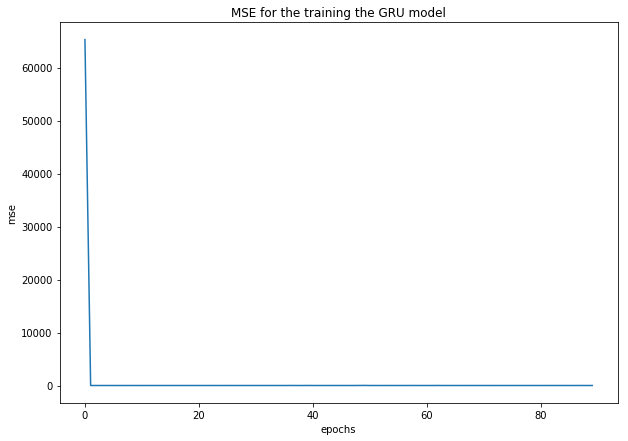

In [22]:
plt.figure(figsize=(10,7))
plt.plot(error1)
plt.title('MSE for the training the GRU model')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.show()

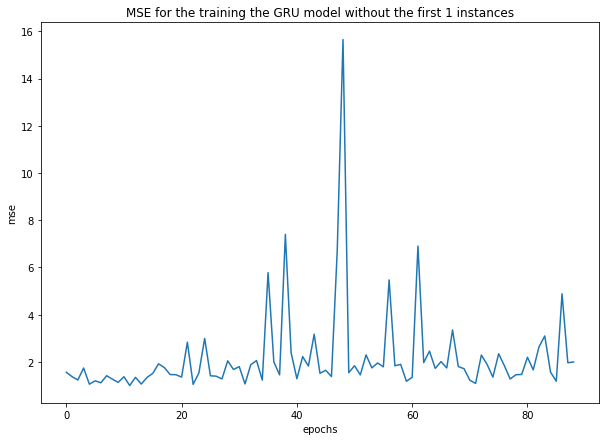

In [23]:
plt.figure(figsize=(10,7))
plt.plot(error1[1:])
plt.title('MSE for the training the GRU model without the first 1 instances')
plt.xlabel('epochs')
plt.ylabel('mse')
plt.show()

In [24]:
with tf.Session() as sess1:
    
    saver1.restore(sess1, "./GRUmodel")

    train_seed = list(train_set[-12:])
    
    for iteration in range(12):
        X_batch = np.array(train_seed[-num_time_steps:]).reshape(1, num_time_steps, 1)
        y_pred = sess1.run(outputs1, feed_dict={X: X_batch})
        train_seed.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./GRUmodel


In [25]:
train_seed

[403.64,
 404.55,
 406.07,
 406.64,
 407.06,
 408.95,
 409.91,
 409.12,
 407.2,
 405.24,
 403.27,
 403.64,
 404.18527,
 404.58032,
 405.08685,
 405.57208,
 406.0664,
 406.61212,
 407.18463,
 407.69913,
 408.10687,
 408.407,
 408.6057,
 408.80316]

In [26]:
gen1 = train_seed[12:]

In [27]:
test_copy = test_set.copy(deep=True)

In [28]:
test_copy = pd.DataFrame(test_copy)

In [29]:
test_copy['Generated1'] = gen1

In [30]:
test_copy

,CO2,Generated1
720,405.17,404.185272
721,406.75,404.580322
722,408.05,405.086853
723,408.34,405.572083
724,409.26,406.066406
725,410.31,406.612122
726,411.31,407.184631
727,410.88,407.699127
728,408.90,408.106873
729,407.10,408.407013


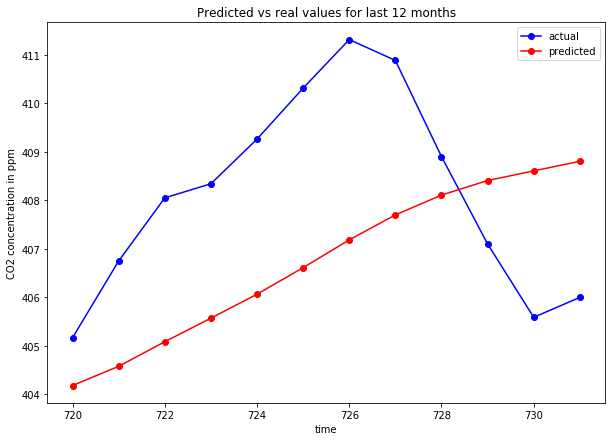

In [31]:
plt.figure(figsize=(10,7))
plt.plot(test_copy['CO2'], marker='o', color='blue', label='actual')
plt.plot(test_copy['Generated1'], marker='o', color='red', label='predicted')
plt.legend(loc='upper right') 
plt.title('Predicted vs real values for last 12 months')
plt.xlabel('time')
plt.ylabel('CO2 concentration in ppm')
plt.show()

To sum things up the model performs worse then the LSTM model. If we decrease the train iterations we get a declining curve. With the inputted parameters we get undervalued results compared to the actual values, but we manage to capture the seasonality, although not very well.